# Notebook zu Blatt 8

In [8]:
!python3 -m pip install numpy seaborn

In [1]:
import numpy as np      # um zufällige arrays zu generieren
import time             # zur zeitmessung
import seaborn as sns   # zum plotten

####  1. Implementieren Sie Selection Sort und Quicksort in Python

In [2]:
from selectionsort import selectionSort

In [3]:
array = [7,5,8,1] 
selectionSort(array)
print(array) # das sortierte array

[1, 5, 7, 8]


In [4]:
from quicksort import quickSort

In [5]:
array = [7,5,8,1] 
quickSort(array)
print(array) # das sortierte array

[1, 5, 7, 8]


#### 2. Pivot-Element beim Quicksort

Man kann durch zufällige Wahl des Pivot-Elements eine erwartete Worst-Case-Laufzeit von O(n log n) erhalten, wohingegen bei einer festen Wahl des Pivot-Elements, etwa vom Anfang des Arrays eine Worst-Case-Laufzeit von O(n^2) herauskommt.

Der Einfachheit der Implementierung als In-Place-Algorithmus wegen haben wir uns dafür entschieden, das jeweils mittlere Array-Element als Pivot-Element zu wählen, da so ohne zusätzlichen Speicherbedarf die Elemente durch Vertauschen um das Pivot-Element herum sortiert werden können.

#### 3. Worst-Case-Eingaben

Selection Sort hat immer die gleiche asymptotische Laufzeit, da durch die Suche des Minimums immer beide Schleifen bis zu `len(a)` durchlaufen müssen und niemals vorzeitig abgebrochen werden kann. Somit gibt es auch keine Worst-Case-Eingabe.

Für Quicksort ist der schlechteste Fall immer dann, wenn das Pivot-Element maximal weit vom Median des Arrays entfernt ist. In unserer Implementation, die immer das mittlere Element als Pivot wählt, ist der Worst-Case daher dann, wenn in jedem rekursiven Schritt das mittlere Element das Minimum oder Maximum des aktuellen Teilarrays ist.

#### 4. Testen Sie die Korrektheit Ihrer Implementierungen anhand von verschiedenen Testfällen

In [42]:
# Hier kommen die Testfälle!
!python3 -m unittest sorting_tests.py

..........
----------------------------------------------------------------------
Ran 10 tests in 0.247s

OK


#### 5. Messen Sie die Laufzeit der beiden Sortieralgorithmen auf Ihrem Rechner.

In [13]:
s_times, q_times = [], []
arrar_sizes =  [10, 100, 500, 1000, 1500, 2000, 2500, 3000, 5000, 7500, 10000] # messung für verschiedenen array-längen
for size in arrar_sizes:
    # ziehe ein zufälliges array
    np.random.seed(0)
    array = np.random.randint(low=0, high=1000000, size=size) 
    start = time.time()

    # hier sortieren mit selection sort
    selectionSort(array.tolist())

    end = time.time()
    s_times.append(end-start) # die zeit in sekunden

    # und dann jetzt noch für quicksort :)

for size in arrar_sizes:
    # ziehe ein zufälliges array
    np.random.seed(0)
    array = np.random.randint(low=0, high=1000000, size=size) 
    start = time.time()

    # hier sortieren mit quicksort
    quickSort(array.tolist())

    end = time.time()
    q_times.append(end-start) # die zeit in sekunden

print("s_times: ", s_times)
print("q_times: ", q_times)


s_times:  [1.1920928955078125e-05, 0.00015592575073242188, 0.003673076629638672, 0.015432357788085938, 0.03411126136779785, 0.06296491622924805, 0.09202122688293457, 0.13354969024658203, 0.36782193183898926, 0.8255224227905273, 1.4679417610168457]
q_times:  [2.2411346435546875e-05, 7.843971252441406e-05, 0.0004639625549316406, 0.0009870529174804688, 0.0015380382537841797, 0.0021278858184814453, 0.002777576446533203, 0.0034172534942626953, 0.006021261215209961, 0.009310722351074219, 0.012503623962402344]


#### 6. Erstellen Sie einen geeignent Plot, der die Laufzeit der beiden Algorithmen in Abhängigkeit von der Eingabelänge darstellt

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

Text(0.5, 1.0, 'Selection Sort')

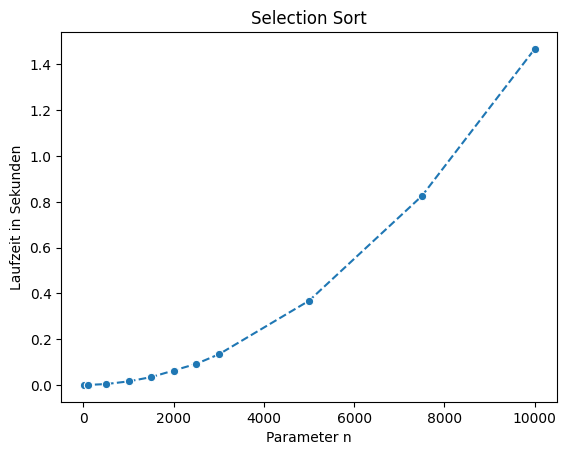

In [18]:
# Hier kommet der Plot!
sns.lineplot(x = arrar_sizes, y = s_times, linestyle="dashed", marker="o") 
plt.xlabel("Parameter n")
plt.ylabel("Laufzeit in Sekunden")
plt.title("Selection Sort")

Text(0.5, 1.0, 'Quicksort')

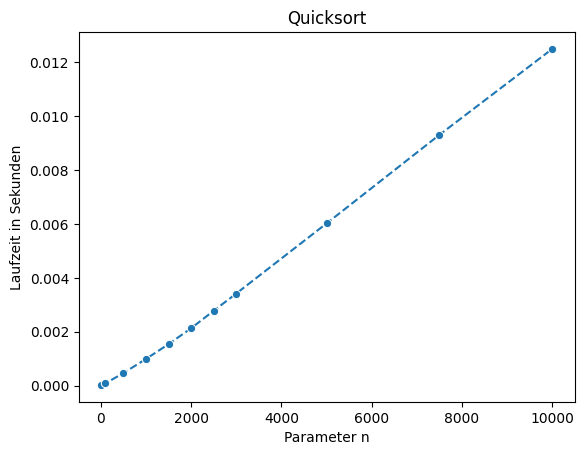

In [19]:
sns.lineplot(x = arrar_sizes, y = q_times, linestyle="dashed", marker="o") 
plt.xlabel("Parameter n")
plt.ylabel("Laufzeit in Sekunden")
plt.title("Quicksort")

Text(0.5, 1.0, 'Quicksort und Selection Sort in einem Diagramm')

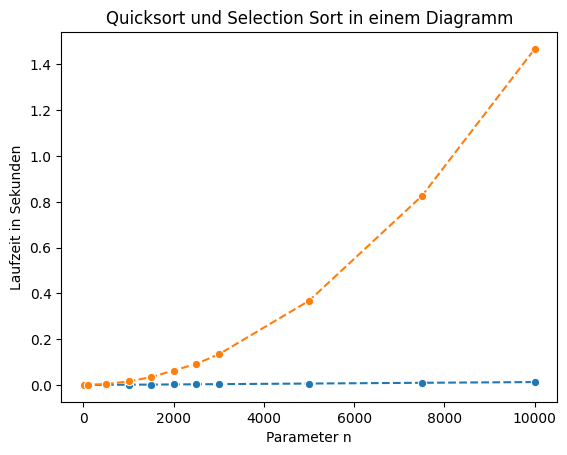

In [21]:
sns.lineplot(x = arrar_sizes, y = q_times, linestyle="dashed", marker="o") 
plt.xlabel("Parameter n")
plt.ylabel("Laufzeit in Sekunden")

sns.lineplot(x = arrar_sizes, y = s_times, linestyle="dashed", marker="o") 
plt.xlabel("Parameter n")
plt.ylabel("Laufzeit in Sekunden")

plt.title("Quicksort und Selection Sort in einem Diagramm")

#### 7. Erstellen Sie für die beiden Sortieralgorithmen jeweils einen Plot, in dem gemessene Laufzeit durch die entsprechende asymptotische Laufzeitentwicklung approximiert wird.

Text(0, 0.5, 'Laufzeit in Sekunden')

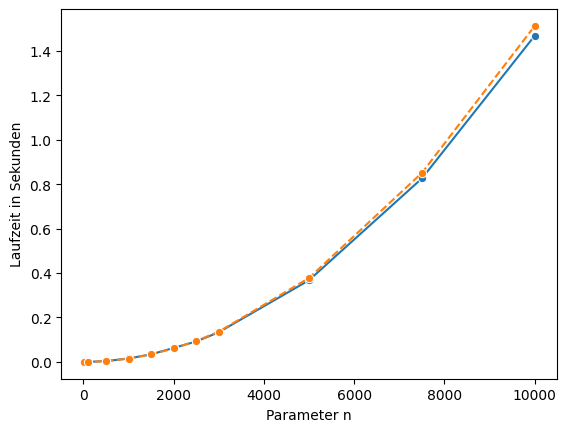

In [28]:
# Hier kommen die Plots!

# Gefundene Konstante, die O(n^2) verdeckt:
C = 1.51187e-8

sns.lineplot(x = arrar_sizes, y = s_times, linestyle="solid", marker="o") 
plt.xlabel("Parameter n")
plt.ylabel("Laufzeit in Sekunden")

sns.lineplot(x = arrar_sizes, y = C * np.array(arrar_sizes)**2, linestyle="dashed", marker="o") 
plt.xlabel("Parameter n")
plt.ylabel("Laufzeit in Sekunden")

Text(0, 0.5, 'Laufzeit in Sekunden')

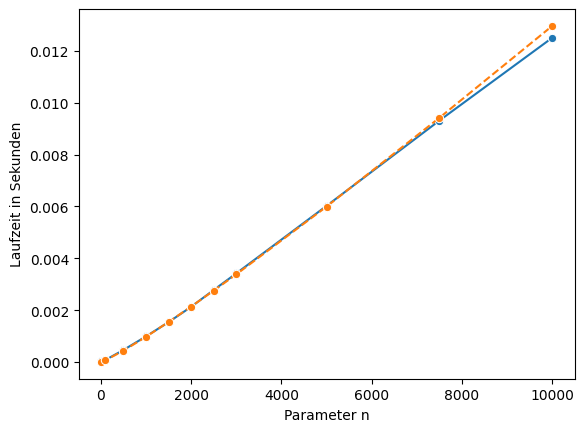

In [32]:
# Hier kommen die Plots!

# Gefundene Konstante, die O(n log n) verdeckt:
C = 9.75382e-8

sns.lineplot(x = arrar_sizes, y = q_times, linestyle="solid", marker="o") 
plt.xlabel("Parameter n")
plt.ylabel("Laufzeit in Sekunden")

sns.lineplot(x = arrar_sizes, y = C * np.array(arrar_sizes) * np.log2(arrar_sizes), linestyle="dashed", marker="o") 
plt.xlabel("Parameter n")
plt.ylabel("Laufzeit in Sekunden")

#### 8. Vergleichen Sie die Laufzeit ihrer effizienten Implementierungen mit der Laufzeit der nativen sort() Funktion für Listen in Python

Text(0.5, 1.0, 'Vergleich der Selection Sort Zeiten von Python und C++')

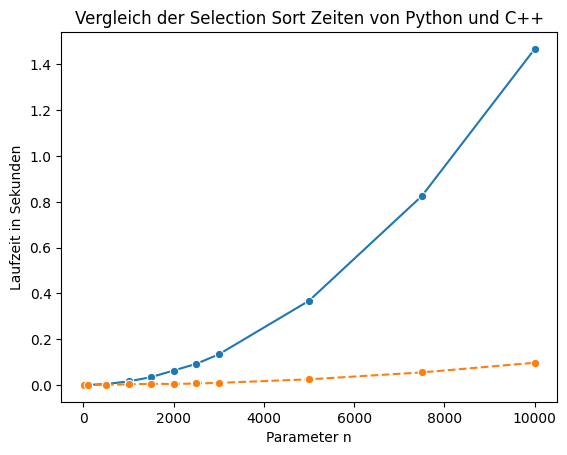

In [35]:
# Hier kommt eure Laufzeitanalyse!

# C++ Selection Sort
cpp_s_times = [3.283e-06, 4.1556e-05, 0.000692901, 0.00259064, 0.00502526, 0.00402408, 
               0.00624861, 0.00894974, 0.0244851, 0.0546796, 0.0968996 ]

sns.lineplot(x = arrar_sizes, y = s_times, linestyle="solid", marker="o") 
plt.xlabel("Parameter n")
plt.ylabel("Laufzeit in Sekunden")

sns.lineplot(x = arrar_sizes, y = cpp_s_times, linestyle="dashed", marker="o") 
plt.xlabel("Parameter n")
plt.ylabel("Laufzeit in Sekunden")

plt.title("Vergleich der Selection Sort Zeiten von Python und C++")

Text(0.5, 1.0, 'Selection Sort: Python Zeit über C++ Zeit')

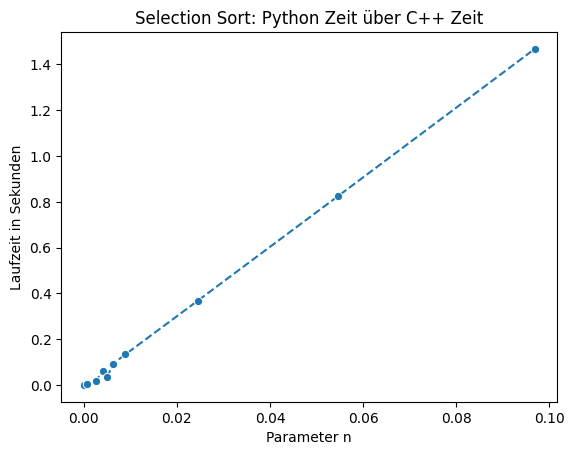

In [37]:
sns.lineplot(x = cpp_s_times, y = s_times, linestyle="dashed", marker="o") 
plt.xlabel("Parameter n")
plt.ylabel("Laufzeit in Sekunden")

plt.title("Selection Sort: Python Zeit über C++ Zeit")

Wie im Plot zu sehen ist, ist der Graph ungefähr linear, also ist der Quotient konstant und hat eine Größenordnung von ungefähr 1.4 / 0.09 ~ 15.6

Text(0.5, 1.0, 'Vergleich der Quicksort Zeiten von Python und C++')

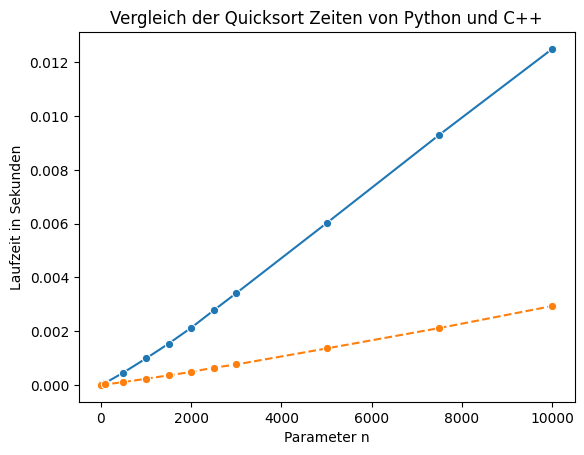

In [77]:
# C++ Quicksort:
cpp_q_times = [ 2.864e-06, 2.0463e-05, 0.000109722, 0.000229709, 0.000359615, 0.000485261, 
                0.00064485, 0.000763511, 0.00136003, 0.00211865, 0.00293838 ]

sns.lineplot(x = arrar_sizes, y = q_times, linestyle="solid", marker="o") 
plt.xlabel("Parameter n")
plt.ylabel("Laufzeit in Sekunden")

sns.lineplot(x = arrar_sizes, y = cpp_q_times, linestyle="dashed", marker="o") 
plt.xlabel("Parameter n")
plt.ylabel("Laufzeit in Sekunden")

plt.title("Vergleich der Quicksort Zeiten von Python und C++")

Text(0.5, 1.0, 'Quicksort: Python Zeit über C++ Zeit')

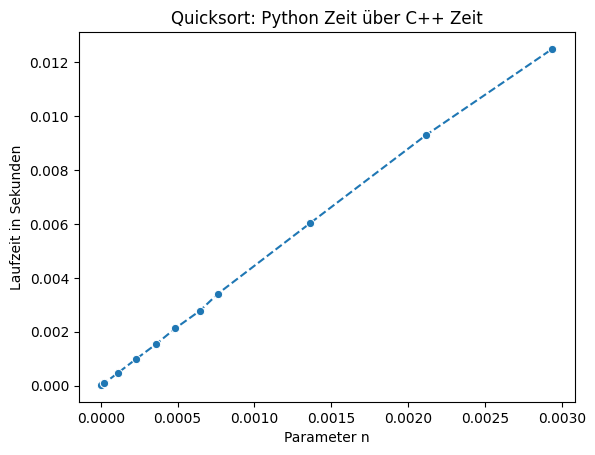

In [39]:
sns.lineplot(x = cpp_q_times, y = q_times, linestyle="dashed", marker="o") 
plt.xlabel("Parameter n")
plt.ylabel("Laufzeit in Sekunden")

plt.title("Quicksort: Python Zeit über C++ Zeit")

Wie im Plot zu sehen ist, ist der Graph ungefähr linear, der Quotient ist also konstant und hat eine Größenordnung von ungefähr 0.012 / 0.0027 ~ 4.4

#### 9. Vergleich mit der nativen sort-Funktion

In [91]:
native_times = []
for size in arrar_sizes:
    # ziehe ein zufälliges array
    np.random.seed(0)
    array = np.random.randint(low=0, high=1000000, size=size) 
    start = time.time()

    # hier sortieren mit eingebautem .sort()
    array.tolist().sort()

    end = time.time()
    native_times.append(end-start) # die zeit in sekunden

print(native_times)

[1.3828277587890625e-05, 2.6702880859375e-05, 0.00012087821960449219, 0.00021314620971679688, 0.0002646446228027344, 0.00035643577575683594, 0.0004894733428955078, 0.0005910396575927734, 0.0011034011840820312, 0.0017843246459960938, 0.002447366714477539]


Text(0.5, 1.0, 'Vergleich der Zeiten für Quicksort mit nativem sort')

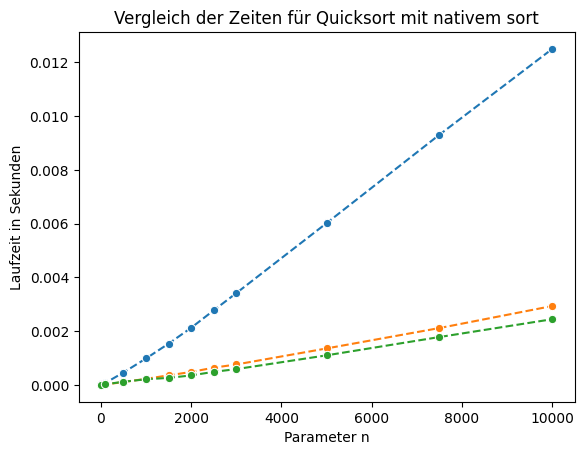

In [56]:
x = sns.lineplot(x = arrar_sizes, y = q_times, linestyle="dashed", marker="o") 
plt.xlabel("Parameter n")
plt.ylabel("Laufzeit in Sekunden")

sns.lineplot(x = arrar_sizes, y = cpp_q_times, linestyle="dashed", marker="o") 
plt.xlabel("Parameter n")
plt.ylabel("Laufzeit in Sekunden")

sns.lineplot(x = arrar_sizes, y = native_times, linestyle="dashed", marker="o") 
plt.xlabel("Parameter n")
plt.ylabel("Laufzeit in Sekunden")

plt.title("Vergleich der Zeiten für Quicksort mit nativem sort")

Wie hier zu sehen ist, ist der native `sort()` von Python sogar noch etwas besser, als unsere Quicksort-Variante in C++. Da Python keine sonderlich effiziente Sprache ist, lässt dies die Vermutung zu, dass `sort()` selbst nicht in Python implementiert ist, sondern durch eine vorkompilierte Bibliothek, die in einer effizienteren Sprache geschrieben wurde, eingebunden ist.

#### 10. Verhältnis effiziente Implementierung und theoretische Laufzeitanalyse

Da die Zeiten von Selection Sort **deutlich** höher sind, als die Zeiten von Quicksort (im höchsten getesteten Fall von 10,000 Elementen hat Python mit Quicksort sogar eine schnellere Zeit als C++ mit Selection Sort!), ist ein effizienter Algorithmus wohl noch ausschlaggebender, als die Wahl der Programmiersprache. Diese Wahl der Programmiersprache hat in unserem Fall einen Unterschied von Faktor 4 bzw. 15 gemacht, die Größenordnung scheint also um die 10 zu liegen.

Die Betrachtung der asymptotischen Laufzeit von Algorithmen ist daher auch sehr relevant für die Praxis.